## Imported Libraries

In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## Data Collection And Importing

In [52]:
movieratings=pd.read_csv("Movie_Ratings.csv") 
movietitles=pd.read_csv("Movie_Id_Titles.csv")

In [53]:
movieratings

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [54]:
movietitles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [55]:
data =pd.merge(movieratings, movietitles, on='item_id') #merging Datasets on item_id

In [56]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [57]:
data = data.drop(['timestamp'], axis=1) #dropping irrelevant columns


## Data Visualisation

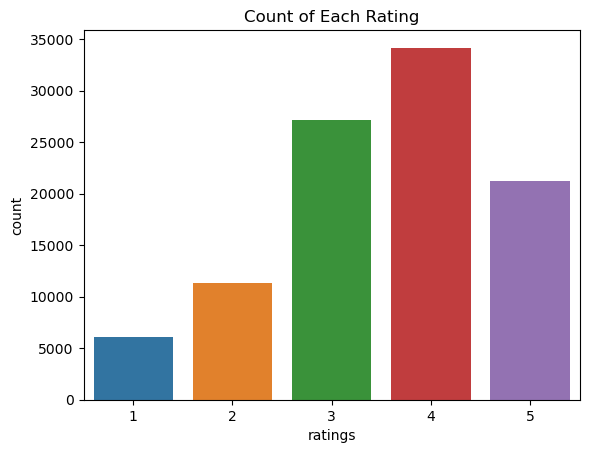

In [58]:
sns.countplot(data=data,x="rating") 
plt.xlabel("ratings") 
plt.ylabel("count") 
plt.title("Count of Each Rating") 
plt.show()

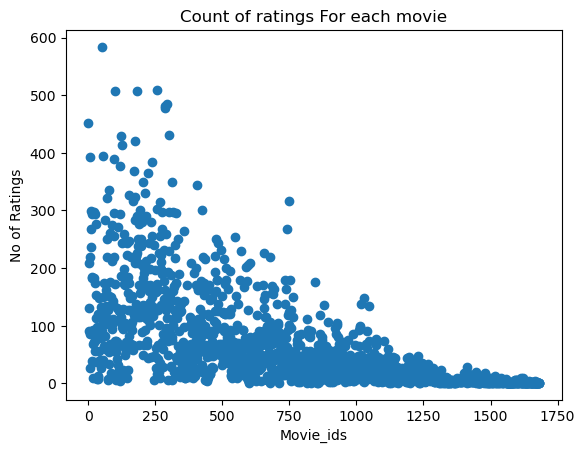

In [59]:
moviesratingscount=data.groupby("item_id")["rating"].agg('count') 
plt.scatter(x=moviesratingscount.index,y=moviesratingscount.values) 
plt.xlabel("Movie_ids") 
plt.ylabel("No of Ratings") 
plt.title("Count of ratings For each movie") 
plt.show()

In [60]:
train_data =data.pivot_table(index='item_id', columns='user_id', values='rating')
train_data

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extracting Movies with above 50 ratings For Finding Patterns Between Movies

In [61]:
train_data=train_data.loc[moviesratingscount[moviesratingscount>50].index,:] 


In [62]:
train_data.fillna(0,inplace=True) #replacing 0 for null ratings to movies
train_data

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Cosine Similarity For Finding Similarities 

In [63]:
moviesimilarity= cosine_similarity(train_data)
np.fill_diagonal(item_similarity, 0)#replacing 0 to avoid self similarity of movies 

## Recommendation Function

In [64]:
def get_recommended_movies():  
    userid=int(input("Enter User_id: "))
    userratings=train_data[userid]  
    Moviesimilarities=moviesimilarity.dot(userratings) 
    Movie_ids=userratings.index 
    l=zip(Movie_ids,Moviesimilarities) 
    l=sorted(l,key=lambda x:x[1],reverse=True) 
    top10movieids=[i  for i,id in l][0:10] 
    top10movies=movietitles.loc[top10movieids,"title"]
    recommendedmovies=pd.DataFrame(top10movies.values,columns=["Recommended_Movies_For_User"]) 
    return recommendedmovies
    

## Suggesting Movies For Given Input userid

In [65]:
movies=get_recommended_movies()  
movies

Enter User_id: 5


,Recommended_Movies_For_User
0,Brazil (1985)
1,Patton (1970)
2,"Princess Bride, The (1987)"
3,"Wrong Trousers, The (1993)"
4,M*A*S*H (1970)
5,Dead Poets Society (1989)
6,Star Trek III: The Search for Spock (1984)
7,Raiders of the Lost Ark (1981)
8,Much Ado About Nothing (1993)
9,Children of the Corn: The Gathering (1996)
